<a href="https://colab.research.google.com/github/smit585/SelfDrivingCar/blob/master/Course%201%20Introduction%20to%20Self%20Driving%20Car/Week%204%20Vehicle%20Dynamimc%20Modeling/%20LongitudinalControl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class Vehicle():
    def __init__(self):
 
        # ==================================
        #  Parameters
        # ==================================
    
        #Throttle to engine torque
        self.a_0 = 400
        self.a_1 = 0.1
        self.a_2 = -0.0002
        
        # Gear ratio, effective radius, mass + inertia
        self.GR = 0.35
        self.r_e = 0.3
        self.J_e = 10
        self.m = 2000
        self.g = 9.81
        
        # Aerodynamic and friction coefficients
        self.c_a = 1.36
        self.c_r1 = 0.01
        
        # Tire force 
        self.c = 10000
        self.F_max = 10000
        
        # State variables
        self.x = 0
        self.v = 5
        self.a = 0
        self.w_e = 100
        self.w_e_dot = 0
        
        self.sample_time = 0.01
        
    def reset(self):
        # reset state variables
        self.x = 0
        self.v = 5
        self.a = 0
        self.w_e = 100
        self.w_e_dot = 0

In [0]:
class Vehicle(Vehicle):
    def step(self, throttle, alpha):
        # ==================================
        #  Implement vehicle model here
        # ==================================
        # Change alpha into numpy
        alpha
        # Calculate engine torque
        Te = throttle * (self.a_0 + self.a_1 * self.w_e + self.a_2 * self.w_e ** 2)
        
        # Calculate components of F_load
        F_aero = self.c_a * self.v ** 2
        R_x   = self.c_r1 * self.v
        F_g   = self.m * self.g * np.sin(alpha)
        
        F_load = F_aero + R_x + F_g
                      
        # Calculate Fx using Tire Model. 
        # Wheel angular velocity
        w_w = (self.GR) * self.w_e
        
        # Calculate slip ratio
        s = ((w_w * self.r_e) - self.v) / self.v
        
        # Tire model is linear here.
        if abs(s) < 1:
            Fx = self.c * s
        else:
            Fx = self.F_max
        
        # Update the Engine's angular velocity
        self.w_e = self.w_e + self.w_e_dot * self.sample_time
        
        # Update the Enginer's angular acceleration
        self.w_e_dot = ((Te - (self.GR) * (self.r_e) * (F_load)) / self.J_e)       
        
        # Update the Acceleration, Velocity and Position of the car
        self.x = self.x + self.v * self.sample_time
        self.v = self.v + self.a * self.sample_time
        self.a = (Fx - F_load) / self.m
        
        pass   
    

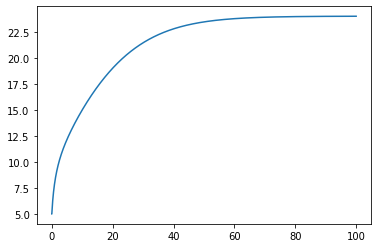

In [3]:
sample_time = 0.01
time_end = 100
model = Vehicle()

t_data = np.arange(0,time_end,sample_time)
v_data = np.zeros_like(t_data)

# throttle percentage between 0 and 1
throttle = 0.2

# incline angle (in radians)
alpha = 0

for i in range(t_data.shape[0]):
    v_data[i] = model.v
    model.step(throttle, alpha)
    
plt.plot(t_data, v_data)
plt.show()

In [0]:
time_end = 20
t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)

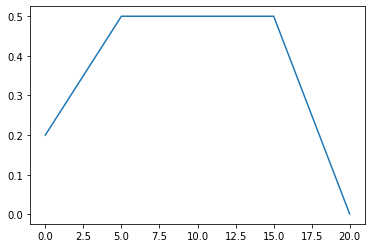

In [5]:
throttle = np.zeros_like(t_data);
slopeAscent = (0.5-0.2)/500
slopeDescent = (0 - 0.5)/500
throttle[0:500] = np.arange(0.2,0.5,slopeAscent)
throttle[500:1500] = 0.5
throttle[1500:2000] = np.arange(0.5,0,slopeDescent)
plt.plot(t_data, throttle)

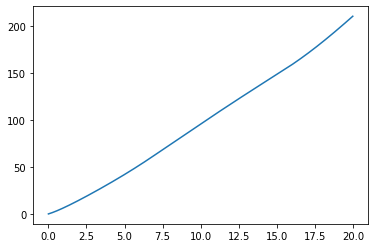

In [6]:
time_end = 20
t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)

# reset the states
model.reset()

# Create the throttle profile
throttle = np.zeros_like(t_data);
slopeAscent = (0.5-0.2)/500
slopeDescent = (0 - 0.5)/500
throttle[0:500] = np.arange(0.2,0.5,slopeAscent)
throttle[500:1500] = 0.5
throttle[1500:2000] = np.arange(0.5,0,slopeDescent)
# ==================================
#  Learner solution begins here
# ==================================
for i in range(t_data.shape[0]):
    x_data[i] = model.x
    if model.x < 60:
        alpha = np.tan(3/60)
    elif model.x < 150:
        alpha = np.tan(9/90)
    else:
        alpha = 0
    
    model.step(throttle[i], alpha)
# ==================================
#  Learner solution ends here
# ==================================

# Plot x vs t for visualization
plt.plot(t_data, x_data)
plt.show()